In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import math

In [2]:
tk = th.Thicket.from_caliperreader(glob("caliper_files_0/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 65/65 [00:01<00:00, 41.03it/s]


In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.832 comp
├─ 0.001 comm
├─ 0.323 comp_large
└─ 0.038 correctness_check
0.031 data_init

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.83 indices: {'profile': 12688372})
█ 0.75 - 0.83
█ 0.58 - 0.75
█ 0.42 - 0.58
█ 0.25 - 0.42
█ 0.08 - 0.25
█ 0.00 - 0.08

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")



tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type               
{'name': 'comp', 'type': 'function'} 2         65536      sorted      1776344737   
                                               262144     sorted      3942532205   
                                               1048576    sorted      3879990645   
                                               4194304    sorted       653057224   
                                               16777216   sorted      2689570537   

                                                                      nid  \
node                                 num_procs input_size input_type        
{'name': 'comp', 'type': 'function'} 2         65536      sorted      3.0   
                                               262144     sorted      3.0   
                                               1048576    sorted      3.0   
                                               4194304    sorted      3.0   
                                               16777216   sorted      3.0   

                                                                       spot.channel  \
node                                 num_procs input_size input_type                  
{'name': 'comp', 'type': 'function'} 2         65536      sorted      regionprofile   
                                               262144     sorted      regionprofile   
                                               1048576    sorted      regionprofile   
                                               4194304    sorted      regionprofile   
                                               16777216   sorted      regionprofile   

                                                                      Min time/rank  \
node                                 num_procs input_size input_type                  
{'name': 'comp', 'type': 'function'} 2         65536      sorted           0.029937   
                                               262144     sorted           0.152837   
                                               1048576    sorted           0.723691   
                                               4194304    sorted           3.464523   
                                               16777216   sorted          16.334908   

                                                                      Max time/rank  \
node                                 num_procs input_size input_type                  
{'name': 'comp', 'type': 'function'} 2         65536      sorted           0.095538   
                                               262144     sorted           0.473336   
                                               1048576    sorted           2.286922   
                                               4194304    sorted          10.915086   
                                               16777216   sorted          51.373821   

                                                                      Avg time/rank  \
node                                 num_procs input_size input_type                  
{'name': 'comp', 'type': 'function'} 2         65536      sorted           0.062737   
                                               262144     sorted           0.313086   
                                               1048576    sorted           1.505306   
                                               4194304    sorted           7.189804   
                                               16777216   sorted          33.854365   

                                                                      Total time  \
node                                 num_procs input_size input_type               
{'name': 'comp', 'type': 'function'} 2         65536      sorted        0.125474   
                                               262144     sorted        0.626173   
                                               1048576    sorted        3.010613   
                                               4194304    sorted       14.379608   


In [5]:
df = tk.dataframe

# STRONG SCALING TIME

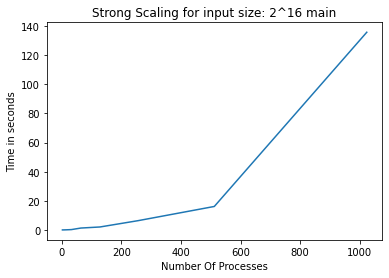

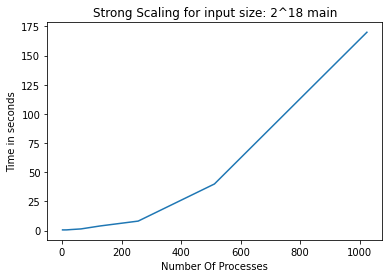

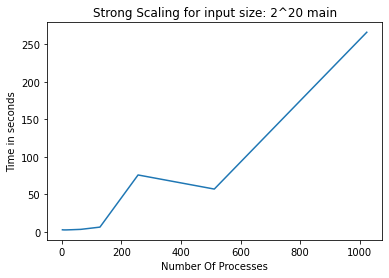

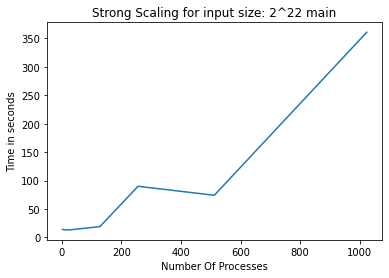

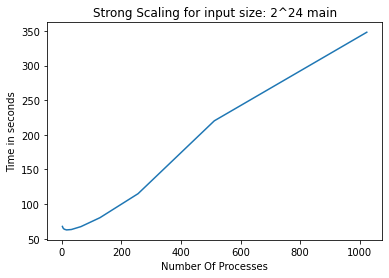

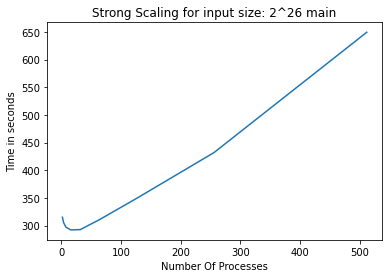

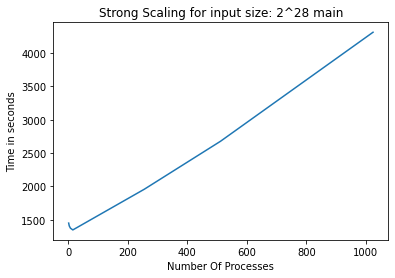

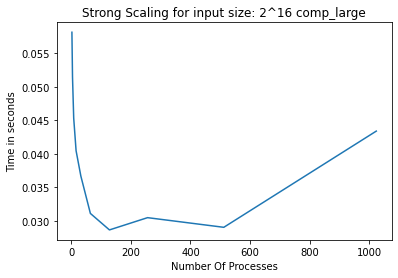

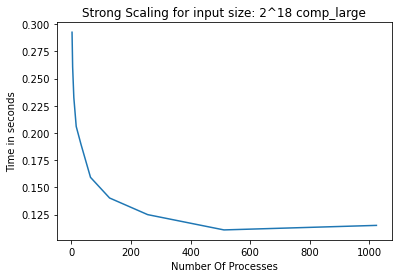

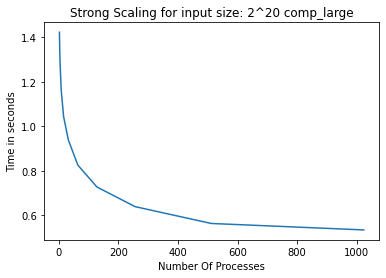

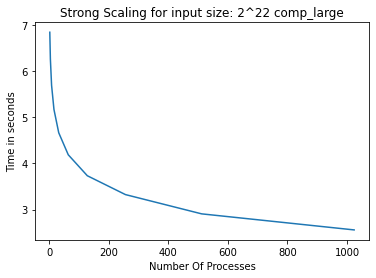

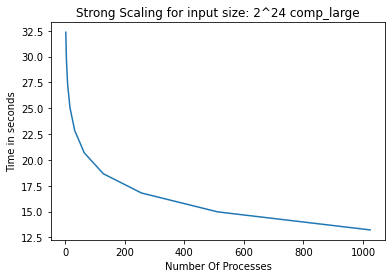

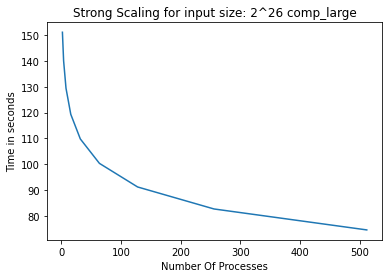

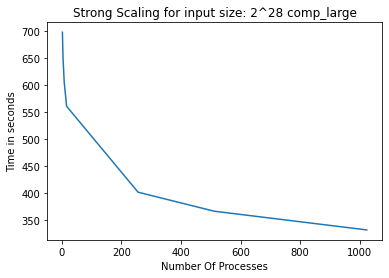

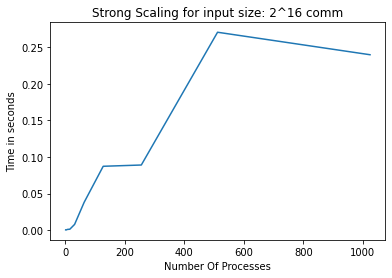

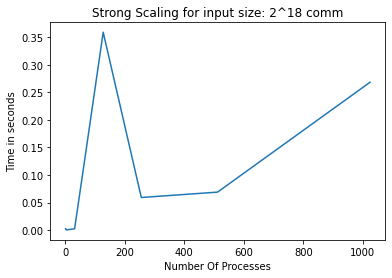

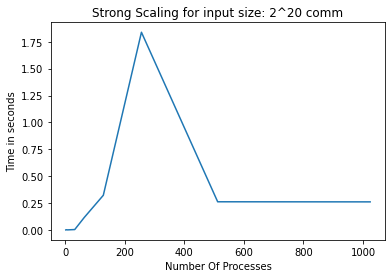

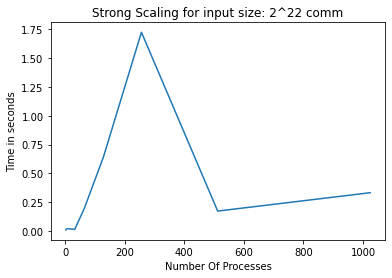

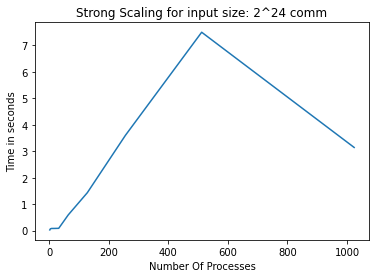

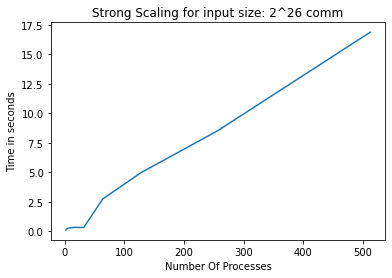

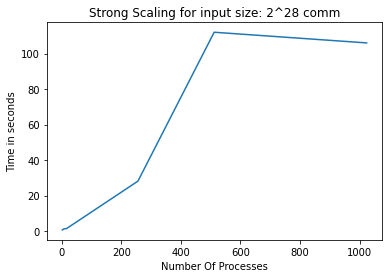

In [6]:
input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

for task in ["comp", "comp_large", "comm"]:


    df_task = df[df['name'] == task]
    df_unique = df_task[~df_task.index.duplicated(keep='first')]

    for input_size in input_sizes: 

        filtered_df = df_unique.xs(input_size, level='input_size')
        filtered_df_reset = filtered_df.reset_index(level='num_procs')
        
        if task == "comp":
            task = "main"

        plt.title("Strong Scaling for input size: 2^{} {}".format(int(math.log2(input_size)), task))
        plt.plot(filtered_df_reset['num_procs'], filtered_df_reset['Total time'])
        plt.xlabel("Number Of Processes")
        plt.ylabel("Time in seconds")
        plt.show()

# STRONG SCALING SPEEDUP

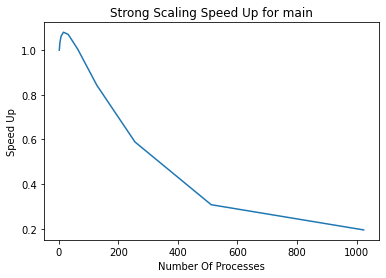

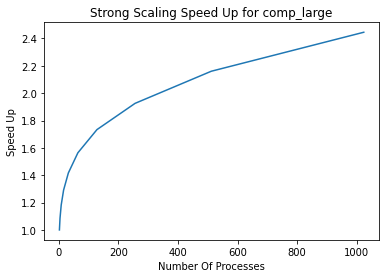

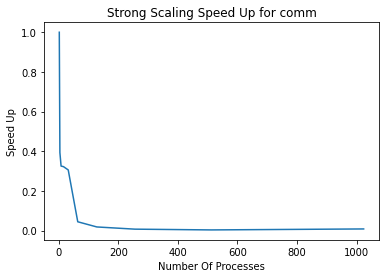

In [7]:
for task in ["comp", "comp_large", "comm"]:


    df_task = df[df['name'] == task]
    df_unique = df_task[~df_task.index.duplicated(keep='first')]



    filtered_df = df_unique.xs(input_sizes[4], level='input_size')
    filtered_df_reset = filtered_df.reset_index(level='num_procs')


    t_min = filtered_df_reset[filtered_df_reset['num_procs']==2]['Total time'].values[0]
    t_min

    speed_up = list(t_min / filtered_df_reset['Total time'].values)

    num_procs_possible = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    
    if task == "comp":
        task = "main"

    plt.plot(num_procs_possible, speed_up)
    plt.title("Strong Scaling Speed Up for {}".format(task))
    plt.xlabel("Number Of Processes")
    plt.ylabel("Speed Up")
    plt.show()

# WEAK SCALING

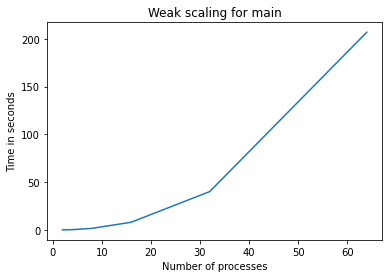

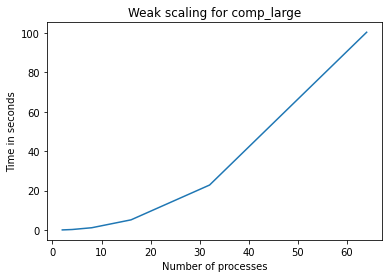

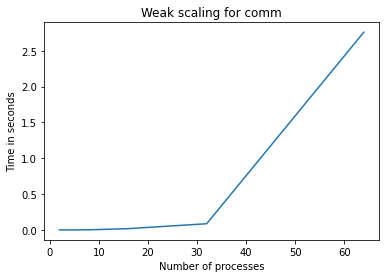

In [8]:
for task in ["comp", "comp_large", "comm"]:
    
    df_task = df[df['name'] == task]
    df_unique = df_task[~df_task.index.duplicated(keep='first')]
    
    df_reset = df_unique.reset_index(level="input_size")
    df_reset = df_reset.reset_index(level="num_procs")
    
    def takeLog2(input_size):
        return int(math.log2(input_size))

    df_reset['input_size_log'] = df_reset['input_size'].apply(takeLog2)
    
    

    num_procs_possible = [2, 4, 8, 16, 32, 64]
    all_times = []

    for num_procs in num_procs_possible:


        input_size_log = math.log2(num_procs)*2 + 14

        time = df_reset[((df_reset['num_procs'] == num_procs) & (df_reset['input_size_log'] == input_size_log))]['Total time (exc)'].values[0]


        all_times.append(time)
    
    if task == "comp":
        task = "main"
    

    plt.plot(num_procs_possible, all_times)
    plt.title("Weak scaling for {}".format(task))
    plt.xlabel("Number of processes")
    plt.ylabel("Time in seconds")
    plt.show()